In [2]:
import dataset
import numpy as np
import matplotlib.pyplot as plt

db = dataset.connect('sqlite:///../../data/barsave.db')

estimators = {}

for row in db.query('select name, score from estimators'):
    key = row.get('name')
    val = row.get('score')
    key_arr = key.split('_')
    if len(key_arr) == 3:
        ins = key_arr[0] + '_' + key_arr[1]
        typ = key_arr[2]
    else:
        ins = 'MISC'
        typ = key
    if ins in estimators.keys():
        estimators[ins][typ] = val
    else:
        estimators[ins] = { typ: val }
    
estimators

{'AU200_AUD': {'close': -0.9432741929520692,
  'high': -18.60308907841194,
  'low': -20.758168152027807,
  'open': 0.39467494646066364,
  'vol': -2.1762441785935747},
 'AUD_CAD': {'close': -0.98631241191899,
  'high': -0.002195827255006234,
  'low': -0.0027756981400865782,
  'open': 0.8563041050017111,
  'vol': -0.059434765538234124},
 'AUD_CHF': {'close': -0.9737200912780558,
  'high': -0.0020111460092916006,
  'low': -0.00230465191555354,
  'open': 0.7389431308505765,
  'vol': -0.1524522098717723},
 'AUD_HKD': {'close': -0.9794269709038229,
  'high': -0.01745625852095993,
  'low': -0.017218516669899892,
  'open': 0.8461082916849242,
  'vol': 0.015282185954809383},
 'AUD_JPY': {'close': -0.9795629281651029,
  'high': -0.2484154203274327,
  'low': -0.33292779655879406,
  'open': 0.3289112948390584,
  'vol': -0.18969850414735426},
 'AUD_NZD': {'close': -0.984891063617245,
  'high': -0.002746980711512194,
  'low': -0.0028486884122605988,
  'open': 0.9042379132641057,
  'vol': -0.12213066

In [3]:
ope = []
clo = []
hig = []
low = []
#vol = []
for key in estimators.keys():
    if 'open' in estimators[key].keys():
        ope.append(estimators[key].get('open'))
    if 'high' in estimators[key].keys():
        hig.append(estimators[key].get('high'))
    if 'low' in estimators[key].keys():
        low.append(estimators[key].get('low'))
    if 'close' in estimators[key].keys():
        clo.append(estimators[key].get('close'))
    #vol.append(estimators[key].get('vol'))
len(ope)

124

Current size: [18, 12]


{'whiskers': [<matplotlib.lines.Line2D at 0xd252490>,
 'caps': [<matplotlib.lines.Line2D at 0xd2528f0>,
 'boxes': [<matplotlib.lines.Line2D at 0xd252270>],
 'medians': [<matplotlib.lines.Line2D at 0xd252e50>],
 'fliers': [<matplotlib.lines.Line2D at 0xd252ef0>],
 'means': []}

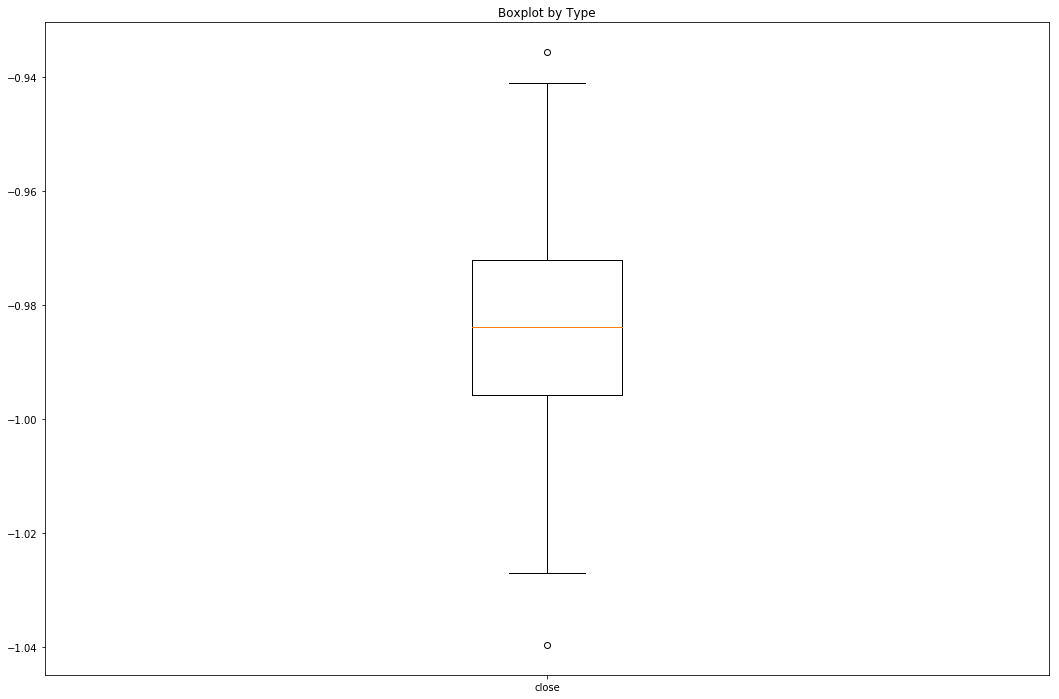

In [5]:
fig1, ax1 = plt.subplots()
fig_size = plt.rcParams["figure.figsize"]
print("Current size: " + str(fig_size))
fig_size[0] = 18
fig_size[1] = 12
ax1.set_title('Boxplot by Type')
#ax1.boxplot([ope, clo, hig, low], labels = ['open', 'close', 'high', 'low'])
ax1.boxplot([clo], labels = ['close'])
# Get current size
#plt.rcParams["figure.figsize"] = fig_size

In [6]:
vlist = []
for key in estimators.keys():
    r2 = estimators[key].get('open')
    r2 += estimators[key].get('close')
    r2 += estimators[key].get('high')
    r2 += estimators[key].get('low')
    r2 += estimators[key].get('vol')
    vlist.append({'ins': key, 'r2': r2})
    
vlist = sorted(vlist, key = lambda x: x.get('r2'), reverse = True)

for line in vlist:
    print(line.get('ins') + ' -- ' + str(line.get('r2')))

TypeError: unsupported operand type(s) for +=: 'NoneType' and 'NoneType'